# Part 04: Evaluation and Ethics - Heart Disease

This final notebook compares the performance of all trained models and discusses the ethical implications of using AI in cardiology.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import ConfusionMatrixDisplay
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

## 1. Performance Comparison

,Model,Accuracy
3,Decision Tree,0.985366
5,MLP,0.985366
6,Random Forest (Optimized),0.985366
2,SVM (RBF),0.887805
1,KNN,0.834146
4,AdaBoost,0.814634
0,Logistic Regression,0.795122


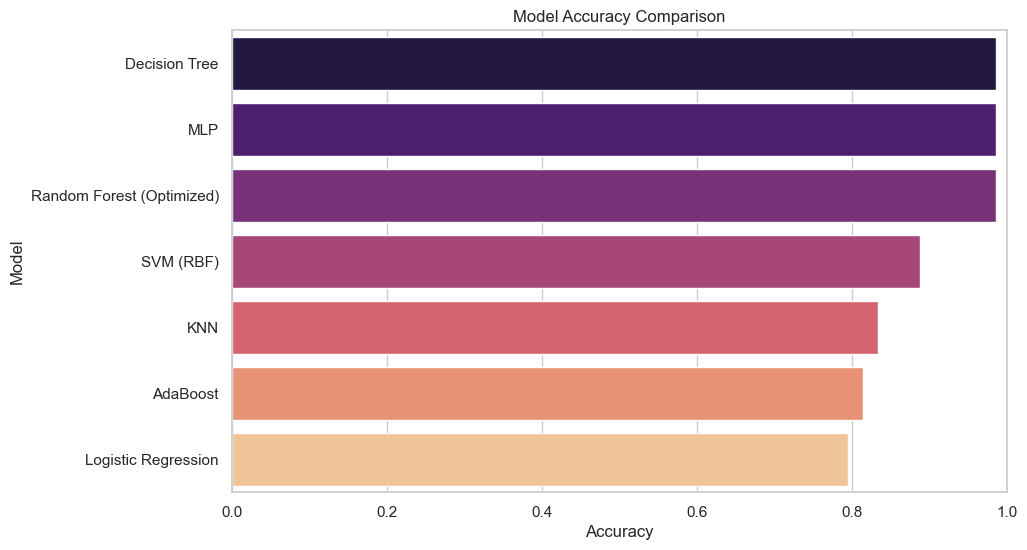

In [2]:
# Load results
results = joblib.load('models_results.pkl')

df_results = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
display(df_results)

plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=df_results, palette='magma')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)
plt.show()

## 2. Best Model Evaluation

<Figure size 800x600 with 0 Axes>

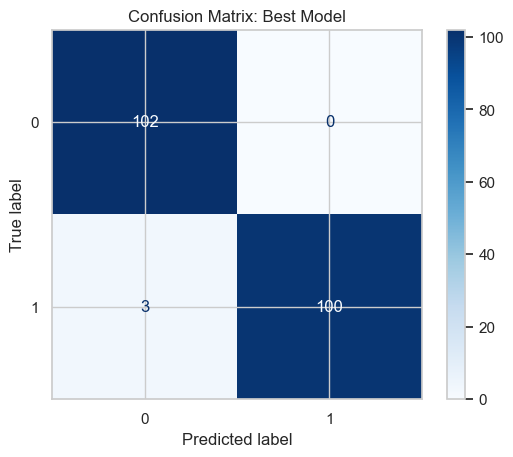

In [3]:
best_model = joblib.load('best_model.pkl')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix: Best Model')
plt.show()

## 3. Medical Ethics

Applying AI to heart disease prediction requires careful consideration of several ethical pillars:

1. **Bias Mitigation**: Ensuring the dataset is representative of various demographics (age, gender, ethnicity) to prevent discriminatory outcomes.
2. **Data Privacy**: Strict adherence to regulations like GDPR or HIPAA to protect sensitive patient health information.
3. **Clinical Accountability**: AI models should be used as clinical decision-support tools, not as the sole diagnostic authority. The final responsibility remains with the healthcare provider.